# Imports:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import chi2

from tqdm import tqdm, trange
import random

import matplotlib.pyplot as plt
import pickle
import statsmodels.api as sm
from scipy.special import expit, logit

# Hyperparameter:

In [2]:
Jn_name = 'Sample Design Matrix'

# Plot Densities when Scheme is Biased in Y:

In [3]:
fitted_FI_and_corr = pd.read_pickle('sample_by_y_bias.pkl')

In [4]:
fitted_FI_and_corr.describe()

,srs_fi,biased_fi,srs_corr,biased_corr,srs_samp_elasticity,biased_samp_elasticity
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,859.304160,843.741254,0.000014,-0.077994,1.000937,0.982809
std,139.548297,1.243483,0.003176,0.002797,0.162549,0.001448
min,363.200000,837.872576,-0.013809,-0.089501,0.423063,0.975973
25%,763.433333,842.898717,-0.002087,-0.079873,0.889264,0.981827
50%,856.233333,843.739139,0.000016,-0.077999,0.997360,0.982806
75%,952.500000,844.575076,0.002127,-0.076109,1.109493,0.983780
max,1582.100000,849.378744,0.017970,-0.065519,1.842865,0.989375


### DDC:

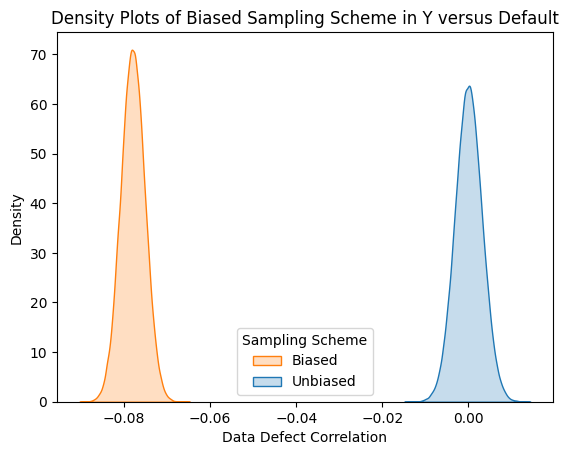

In [4]:
fig = sns.kdeplot(fitted_FI_and_corr[['srs_corr', 'biased_corr']], fill = True)
plt.xlabel('Data Defect Correlation')
plt.ylabel('Density')
plt.legend(title="Sampling Scheme", labels=["Biased", "Unbiased"])
plt.title('Density Plots of Biased Sampling Scheme in Y versus Default')
plt.savefig('ddc_densities_y_bias.png', bbox_inches = 'tight')

### FI:

In [10]:
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Access the blue and orange colors
blue = color_cycle[0]  # 'tab:blue'
orange = color_cycle[1]  # 'tab:orange'

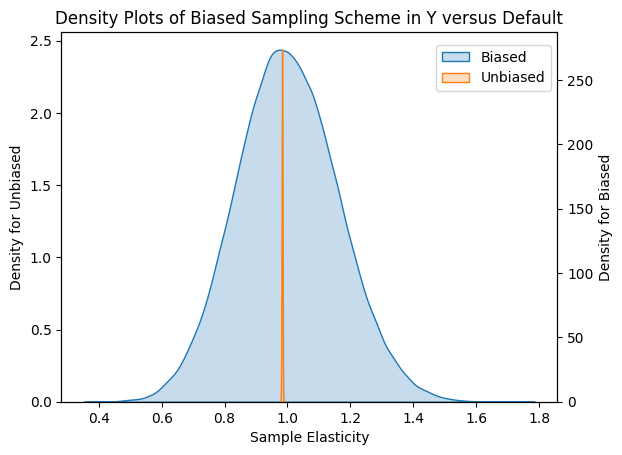

In [6]:
fig, ax1 = plt.subplots()

sns.kdeplot(data=fitted_FI_and_corr['srs_fi'], ax=ax1, color=blue, fill=True, label='Unbiased')
ax1.set_ylabel('Density for Unbiased')
ax1.tick_params(axis='y')
ax1.set_xlabel(f'{Jn_name}')

ax2 = ax1.twinx()
sns.kdeplot(data=fitted_FI_and_corr['biased_fi'], ax=ax2, color=orange, fill=True, label='Biased')
ax2.set_ylabel('Density for Biased')
ax2.tick_params(axis='y')

fig.legend(labels = ['Biased', 'Unbiased'], loc = (0.7, 0.8))

plt.title('Density Plots of Biased Sampling Scheme in Y versus Default')
plt.savefig('samp_elasticity_densities_y_bias.png', bbox_inches = 'tight')

### Joint:

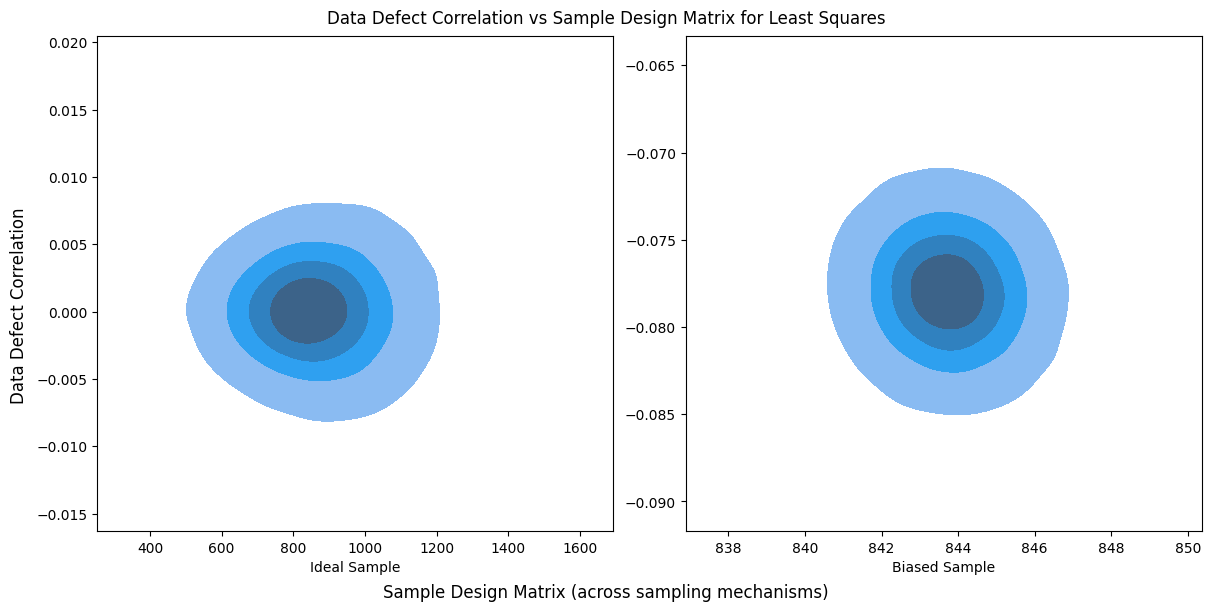

In [6]:
fig, axes = plt.subplots(1, 2, 
                         constrained_layout=True, 
                         figsize=(12, 6))

ax = axes[0]
sns.kdeplot(data = fitted_FI_and_corr, 
            x=f'srs_fi',
            y = f'srs_corr', 
            fill=True, 
            bw_adjust=1.8, 
            levels=5,
            ax=ax
           )
ax.set_xlabel('Ideal Sample')
ax.set_ylabel('')

ax = axes[1]
sns.kdeplot(data = fitted_FI_and_corr, 
            x=f'biased_fi',
            y = f'biased_corr', 
            fill=True, 
            bw_adjust=1.8, 
            levels=5,
            ax=ax
           )
ax.set_xlabel('Biased Sample')
ax.set_ylabel('')

fig.suptitle(f'Data Defect Correlation vs {Jn_name} for Least Squares')
fig.supylabel('Data Defect Correlation')
fig.supxlabel(f'{Jn_name} (across sampling mechanisms)')
plt.savefig('joint_density_y_bias.png', bbox_inches = 'tight')

# Plot Densities when Scheme is Biased in X:

In [27]:
fitted_FI_and_corr = pd.read_pickle('sample_by_x_bias.pkl')

In [28]:
fitted_FI_and_corr.shape

(100000, 6)

In [30]:
0.001964 / np.sqrt(100000)

np.float64(6.210713324570696e-06)

In [29]:
fitted_FI_and_corr[['srs_corr', 'biased_corr']].describe()

,srs_corr,biased_corr
count,100000.000000,100000.000000
mean,-0.000007,-0.000563
std,0.003157,0.001964
min,-0.013255,-0.008483
25%,-0.002117,-0.001883
50%,-0.000004,-0.000568
75%,0.002100,0.000752
max,0.014276,0.008297


### DDC:

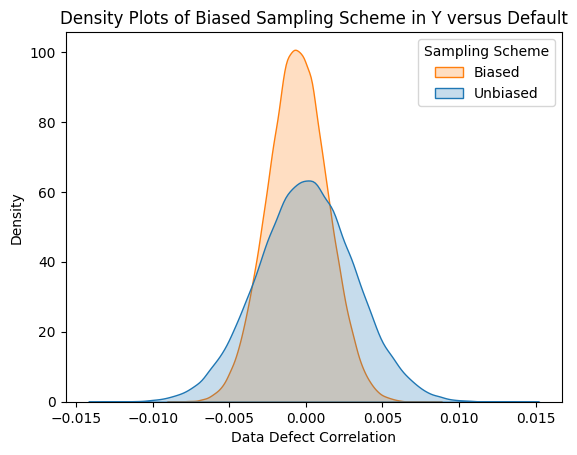

In [18]:
fig = sns.kdeplot(fitted_FI_and_corr[['srs_corr', 'biased_corr']], fill = True)
plt.xlabel('Data Defect Correlation')
plt.ylabel('Density')
plt.legend(title="Sampling Scheme", labels=["Biased", "Unbiased"])
plt.title('Density Plots of Biased Sampling Scheme in Y versus Default')
plt.savefig('ddc_densities_x_bias.png', bbox_inches = 'tight')

### Elasticity:

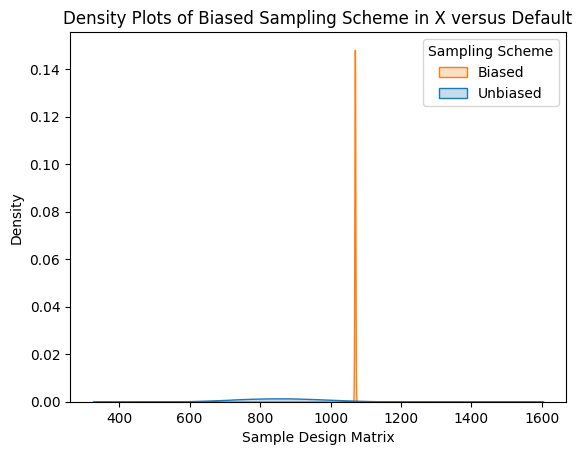

In [19]:
fig = sns.kdeplot(fitted_FI_and_corr[['srs_fi', 'biased_fi']], fill=True)
plt.xlabel(f'{Jn_name}')
plt.ylabel('Density')
plt.legend(title="Sampling Scheme", labels=["Biased", "Unbiased"])
plt.title('Density Plots of Biased Sampling Scheme in X versus Default') 
plt.savefig('samp_elasticity_densities_x_bias.png', bbox_inches = 'tight')

### Joint:

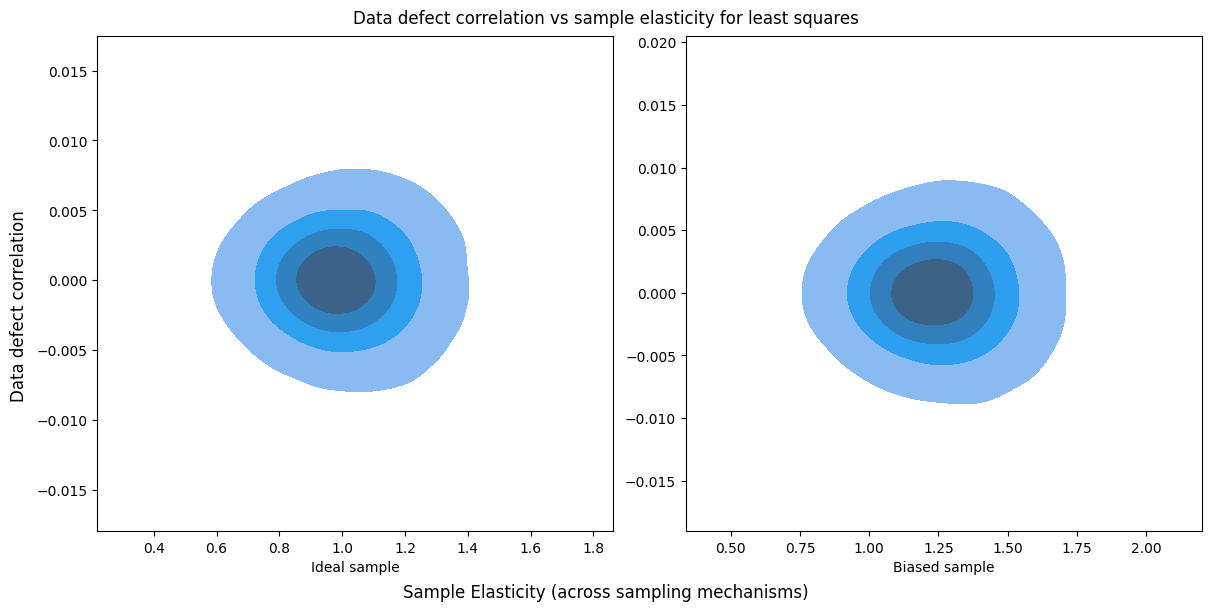

In [12]:
fig, axes = plt.subplots(1, 2, 
                         constrained_layout=True, 
                         figsize=(12, 6))

ax = axes[0]
sns.kdeplot(data = fitted_FI_and_corr, 
            x=f'srs_fi',
            y = f'srs_corr', 
            fill=True, 
            bw_adjust=1.8, 
            levels=5,
            ax=ax
           )
ax.set_xlabel('Ideal Sample')
ax.set_ylabel('')

ax = axes[1]
sns.kdeplot(data = fitted_FI_and_corr, 
            x=f'biased_fi',
            y = f'biased_corr', 
            fill=True, 
            bw_adjust=1.8, 
            levels=5,
            ax=ax
           )
ax.set_xlabel('Biased Sample')
ax.set_ylabel('')

fig.suptitle(f'Data Defect Correlation vs {Jn_name} for Least Squares')
fig.supylabel('Data Defect Correlation')
fig.supxlabel(f'{Jn_name} (across sampling mechanisms)')
plt.savefig('joint_density_x_bias.png', bbox_inches = 'tight')

# Plot Densities when Scheme is Biased in Abs Y:

In [20]:
fitted_FI_and_corr = pd.read_pickle('sample_by_abs_y_bias.pkl')

### DDC:

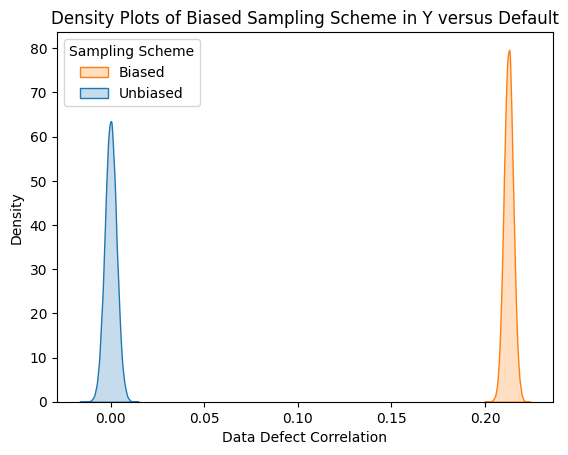

In [21]:
fig = sns.kdeplot(fitted_FI_and_corr[['srs_corr', 'biased_corr']], fill = True)
plt.xlabel('Data Defect Correlation')
plt.ylabel('Density')
plt.legend(title="Sampling Scheme", labels=["Biased", "Unbiased"])
plt.title('Density Plots of Biased Sampling Scheme in Y versus Default')
plt.savefig('ddc_densities_abs_y_bias.png', bbox_inches = 'tight')

### Elasticity:

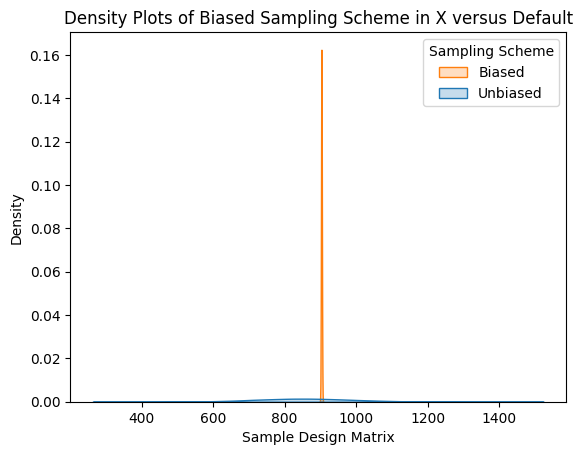

In [22]:
fig = sns.kdeplot(fitted_FI_and_corr[['srs_fi', 'biased_fi']], fill=True)
plt.xlabel(f'{Jn_name}')
plt.ylabel('Density')
plt.legend(title="Sampling Scheme", labels=["Biased", "Unbiased"])
plt.title('Density Plots of Biased Sampling Scheme in X versus Default') 
plt.savefig('samp_elasticity_densities_abs_y_bias.png', bbox_inches = 'tight')

### Joint:

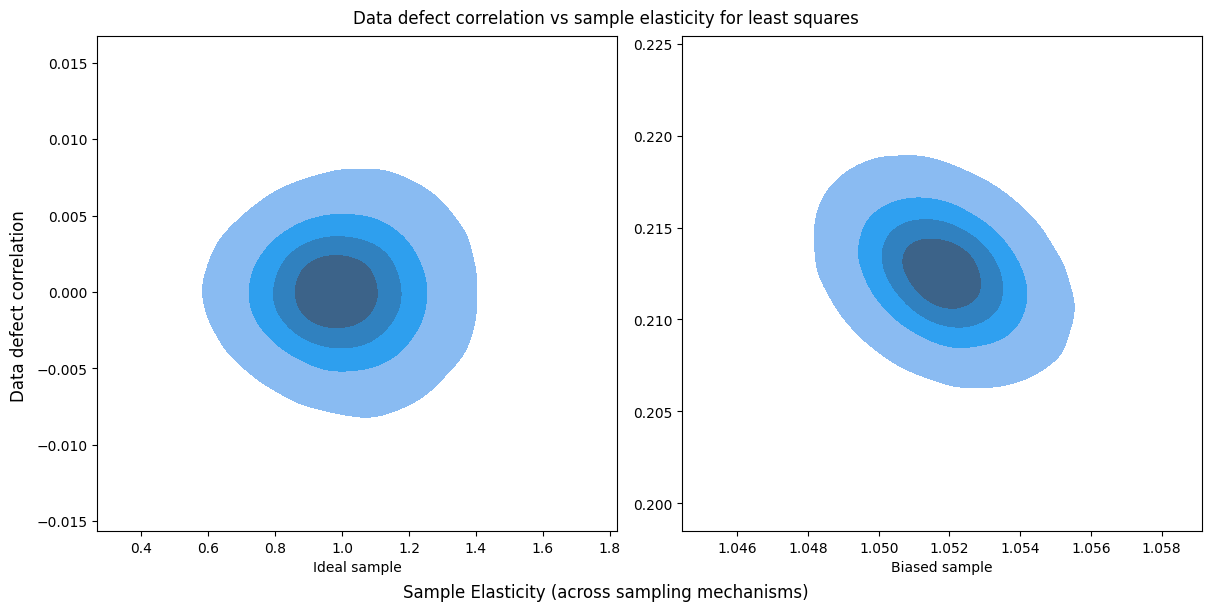

In [16]:
fig, axes = plt.subplots(1, 2, 
                         constrained_layout=True, 
                         figsize=(12, 6))

ax = axes[0]
sns.kdeplot(data = fitted_FI_and_corr, 
            x=f'srs_fi',
            y = f'srs_corr', 
            fill=True, 
            bw_adjust=1.8, 
            levels=5,
            ax=ax
           )
ax.set_xlabel('Ideal Sample')
ax.set_ylabel('')

ax = axes[1]
sns.kdeplot(data = fitted_FI_and_corr, 
            x=f'biased_fi',
            y = f'biased_corr', 
            fill=True, 
            bw_adjust=1.8, 
            levels=5,
            ax=ax
           )
ax.set_xlabel('Biased Sample')
ax.set_ylabel('')

fig.suptitle(f'Data Defect Correlation vs {Jn_name} for Least Squares')
fig.supylabel('Data Defect Correlation')
fig.supxlabel(f'{Jn_name} (across sampling mechanisms)')
plt.savefig('joint_density_abs_y_bias.png', bbox_inches = 'tight')